# Desafio de ciência de dados Indicium

## Importações

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
import joblib

## Carregando dados

In [27]:
df = pd.read_csv('dados/teste_indicium_precificacao.csv')

## Análise Exploratória dos Dados

In [28]:
print("Estatísticas Descritivas:")
print(df.describe())

Estatísticas Descritivas:
                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000  

In [29]:
print("Valores Nulos:")
print(df.isnull().sum())

Valores Nulos:
id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


### Visualização dos dados

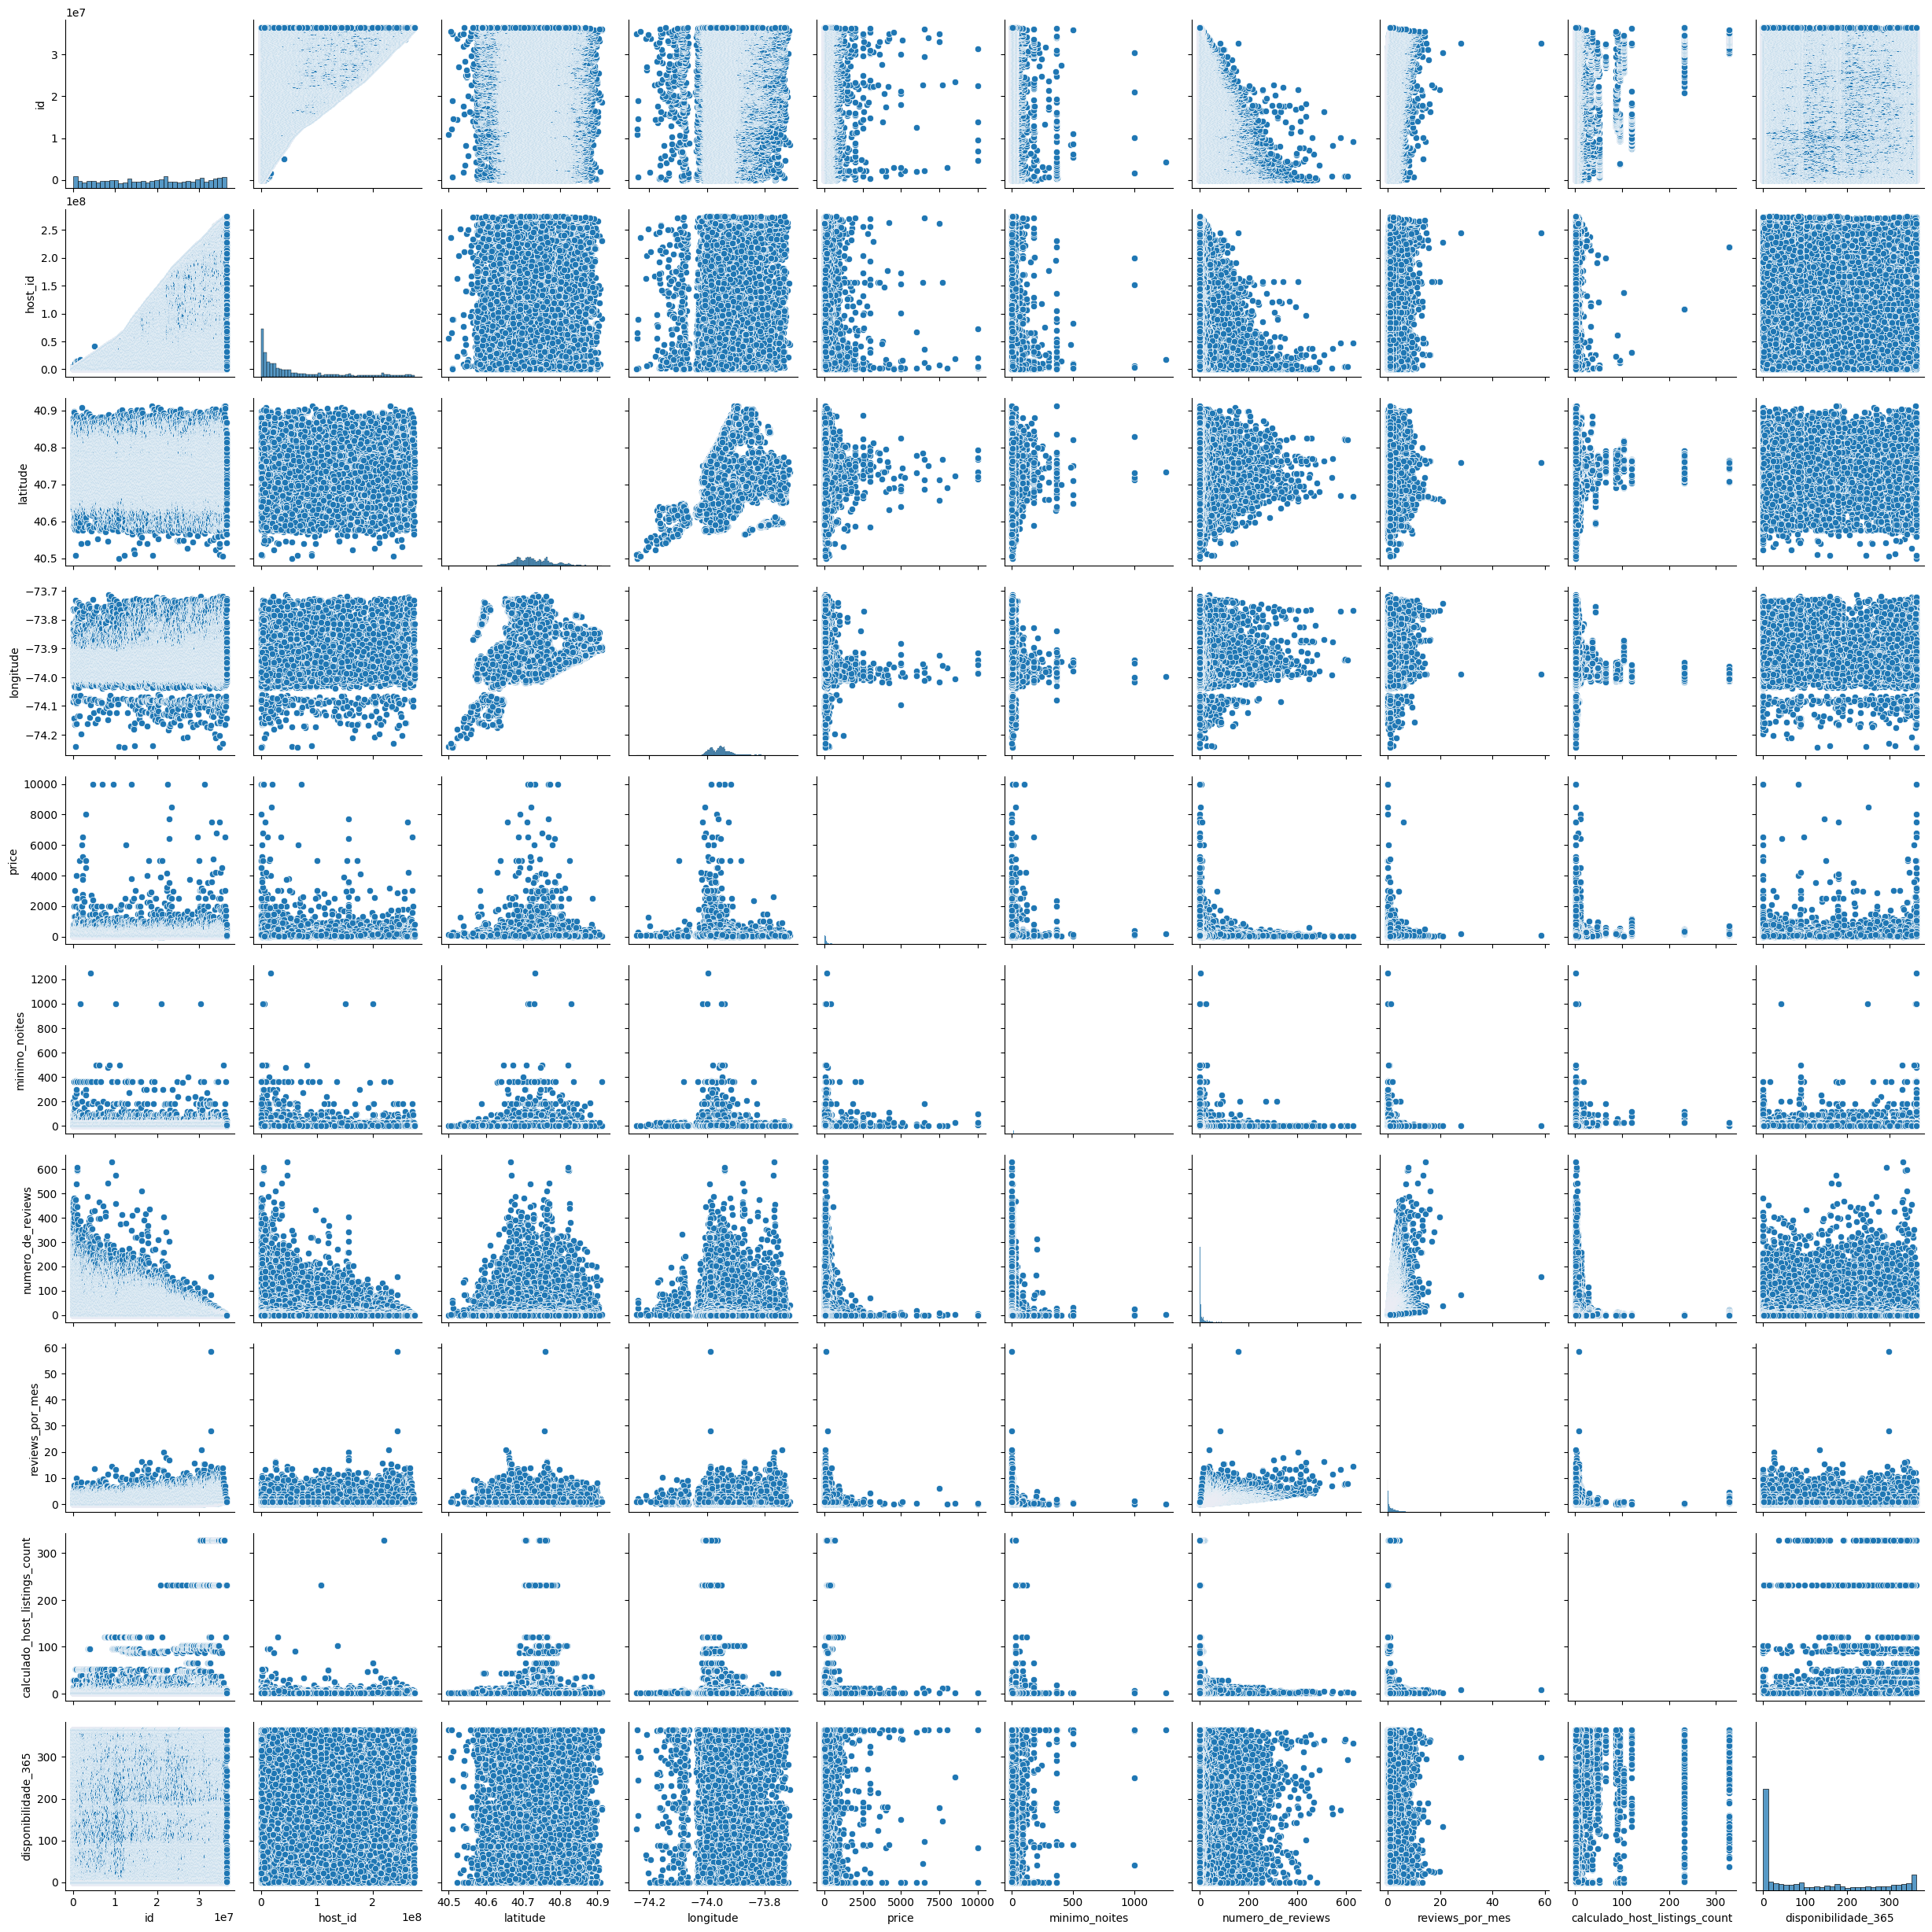

In [30]:
sns.pairplot(df)
plt.show()

### Correlações

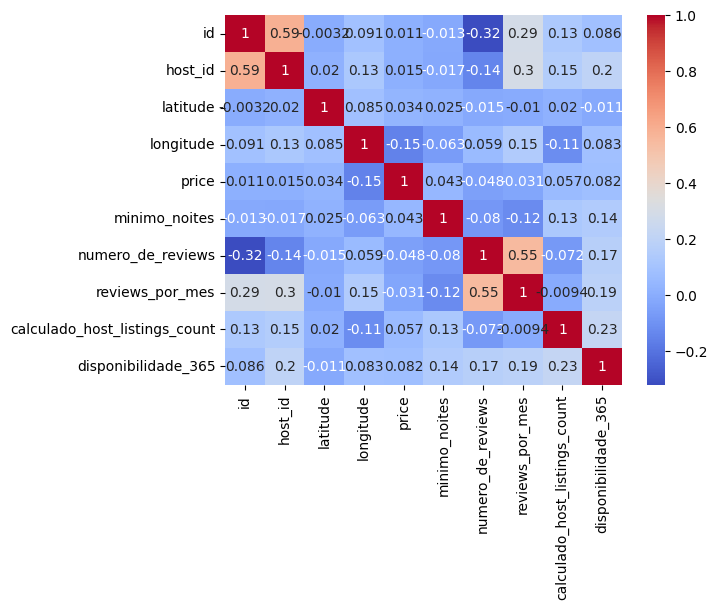

In [31]:
dados_numericos = df.select_dtypes(include=['number'])
correlacoes = dados_numericos.corr()
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.show()

## Respondendo às perguntas

### Primeiro questionamento:
#### Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


In [32]:
print("\nPreço Médio por Bairro:")
print(df.groupby('bairro_group')['price'].mean().sort_values(ascending=False))


Preço Médio por Bairro:
bairro_group
Manhattan        196.875814
Brooklyn         124.381983
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


### Segundo questionamento:
#### O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


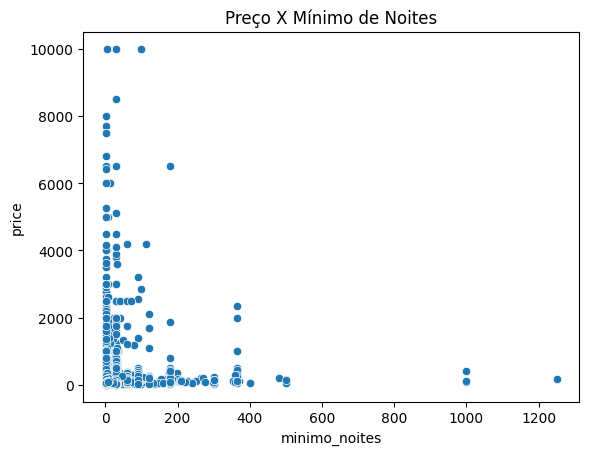

In [39]:
sns.scatterplot(x='minimo_noites', y='price', data=df)
plt.title('Preço X Mínimo de Noites')
plt.show()

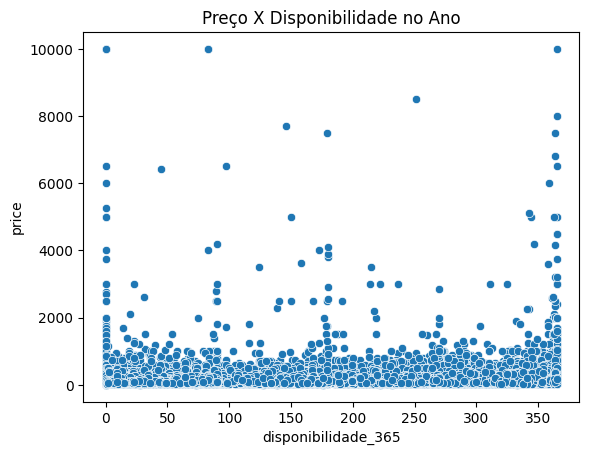

In [38]:
sns.scatterplot(x='disponibilidade_365', y='price', data=df)
plt.title('Preço X Disponibilidade no Ano')
plt.show()

### Terceiro questionamento
#### Existe algum padrão no texto do nome do local para lugares de mais alto valor?


In [35]:
df['nome'] = df['nome'].fillna('')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['nome'])
words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)
word_freq = pd.DataFrame({'word': words, 'count': word_counts})
print("\nPalavras mais frequentes no nome:")
print(word_freq.sort_values('count', ascending=False).head(10))


Palavras mais frequentes no nome:
           word  count
4067         in  16795
6082       room  10281
1738    bedroom   8205
5718    private   7409
1392  apartment   6760
2630       cozy   5097
1425        apt   4739
2027   brooklyn   4175
6702     studio   4106
6948        the   3919


## Modelagem preditiva

### variaveis X e Y

In [40]:
X = df[['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']]
y = df['price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Treinando o modelo

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Avaliando o model

In [43]:
y_pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))


222.6666698901588


## Previsão de preço de um apartamento

In [44]:
apartamento = {
    'latitude': 40.75362,
    'longitude': -73.98377,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

In [46]:
apartamento_df = pd.DataFrame([apartamento])
preco_previsto = model.predict(apartamento_df)
print(f'Preço Previsto para o Apartamento: ${preco_previsto[0]:.2f}')

Preço Previsto para o Apartamento: $243.88


## Salvando o modelo

In [47]:
joblib.dump(model, 'modelo_precificacao.pkl')
print("\nModelo salvo como 'modelo_precificacao.pkl'.")


Modelo salvo como 'modelo_precificacao.pkl'.
